# Merge sort vs. Insertion sort

## Hypothesis
I think that merge sort will be faster than insertion sort for a random array larger than 20 items.

## Methods
The code for this problem can be found in this [github repo](https://github.com/kevinmcmahon22/CSE-830-HW4/tree/main/merge_v_insertion), along with this jupyter notebook and 3 excel sheets for previous runs of the program. The resulting datasheets are also provided so that the C++ program doesn't need to be run each time the below Python code is executed (more on timing in the Discussions section). I compiled my code locally using `g++ sorts.cpp` and ran with `a.exe sorts`, where the filename argument is the output .csv file. I passed *sorts* as an argument to generate the output file *sorts.csv*. I also tried using O2 optimizations by compiling with `g++ sorts.cpp -O2` and running `a.exe sorts_o2` to generate the output file `sorts_o2.csv`.

I used C++ to implement insertion and merge sort. I first created a rough draft of the sorts on my own then used the in class references and this [site](https://www.toptal.com/developers/sorting-algorithms) containing visual aides to common sorting algorithms as a general reference.

I decided to increment the vector size by 50 up to 1200 after many runs of the program with differing number of repitions. Initially 10,000 repitions were used, but to speed up the execution of the program I used 5,000 repitions when generating my final results. As a random number generator I used the Mersenne Twister provided in C++ and fit each number to a uniform distribution between 0 and 1000 as a double. For timing I used the *chrono* header from boost included in C++11. I used a few stack overflow posts to figure out the most effective way to time my program and output the result in seconds.

The below Python script takes in a csv file and outputs the results of that data. There are two data files in the repo, so the script will present a plot for each of them.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def show_plot(filename):
    csvfile = open(filename)
    reader = csv.reader(csvfile, delimiter = ',')
    first_line = next(reader)
    num_elements = int(first_line[0])
    x, insertion, merge = [], [], []
    for row in reader:
        x.append(row[0])
        insertion.append(float(row[1]))
        merge.append(float(row[2]))
    plt.figure(figsize=(12,9))
    plt.plot(x, merge, label = 'Merge sort')
    plt.plot(x, insertion, label = 'Insertion sort')
    plt.legend()
    plt.xlabel('Size of vector, N')
    plt.ylabel('Time to sort {:,} random vectors, s'.format(num_elements))
    
    plot_title = 'Merge sort vs. insertion sort runtime'
    if 'o2' in filename:
        plot_title += ', compiled with O2 optimizations'
    plt.title(plot_title)

In [8]:
files = ['sorts.csv', 'sorts_o2.csv']

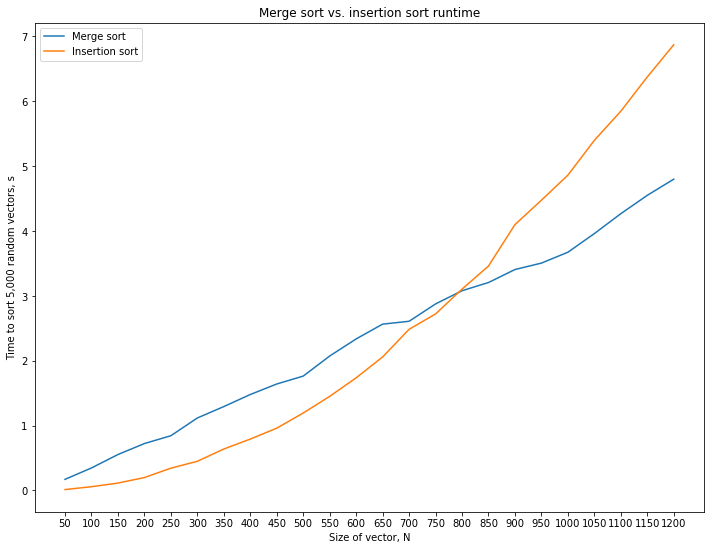

In [11]:
show_plot(files[0])

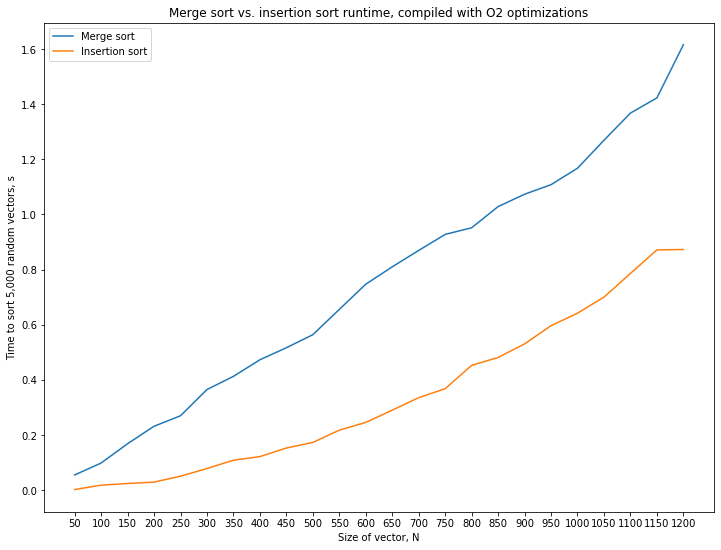

In [12]:
show_plot(files[1])

## Results
The data generated shows that insertion sort is actually more efficient than merge sort for a size less than around 800 elements. The algorithm did take a sizeable amount of time to run since I didn't use optimization flags initially, so I decided to compile and run the same code with O2 optimizations. The plots for both sets of data are shown below, or can be viewed above when the python script is run locally in the github repo.

I used variables in the C++ program to step through vector sizes and generate random vectors to be sorted. I initially plotted from 1 to 40 counting by 1, but I quickly realized that this was much too small of a vector size to gain meaningful comparisions. 

## Discussion
The experimental corssover point of insertion and merge sort was far more than what I predicted, which may be a result of coding this in C++. I have read and implemented these in Python in the past which is why I chose the value I did for my hypothesis. Another note to make is the compilation and run time differences. The run time for this algorithm was around 2/3 minutes, enough time for me to walk to my kitchen and make a bagel. The O2 runtime felt much shorter and compiled a hair faster as well. In both cases, I think that generating the random vectors for every single run of the algorithm took up a decent amount of computational resources. Although this value was likely small compared to the time for the sorts to execute, the vector generation cannot be discounted.

The other shocking result was that using O2 optimizations made merge sort fat less effective. In fact, the crossover point was nowhere in sight by the time 1600 elements was reached. Both algorithms time appears to increase linearly or even exponentially, which is not the case when no optimizations are applied. This goes to show that although the algorithm did complete in a faster time, the loss of accuracy is enough to show that no optimizations may work better when comparing sorting algorithms. I will try and look at another way to change the algorithm when doing the next problem on timsort.

## Conclusion
Insertion sort performs better than merge sort for vector sizes under ~800, at which point merge sort will be more effective.